In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle


** 2 DATA LOADING & UNDERSTANDING**

In [33]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
df=pd.read_csv("train.csv")

In [38]:
df.shape

(800, 22)

In [40]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [42]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [46]:
#display call coloums 
pd.set_option('display.max_columns',None)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [50]:
#convert age colounm datatype to integer
df["age"]=df["age"].astype(int)

In [52]:
df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [58]:
for col in df.columns:
    numerical_features=["ID","age","result"]
    if col not in numerical_features:
        print(col,df[col].unique())
        print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [60]:
# drop two columns
df=df.drop(columns=["ID","age_desc"])

In [62]:
df.shape

(800, 20)

In [64]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [66]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [84]:
# define the mapping dictionary for country names
mapping={
    "Viet Nam": "Vietnam",
    "AmericanSamoa":"united states",
    "Hong kong":"china"
}
# replace value in the country column
df["contry_of_res"]=df["contry_of_res"].replace(mapping)

In [86]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'united states', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [94]:
#target class distribution 
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**INSIGHTS**


1.missing values ion ethnicity & relation
2.age_desc column has only one 1 unique value so it is removed as it is not important for prediction
3.fixed country names
4.identified class imbalence in target column

3. **EDA**


In [99]:
df.shape

(800, 20)

In [101]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [103]:
df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [105]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**univariate analysis**

numerical columns 
age 
result

In [111]:
# set the desired theme
sns.set_theme(style="darkgrid")

Mean: 27.96375
Median: 24.0


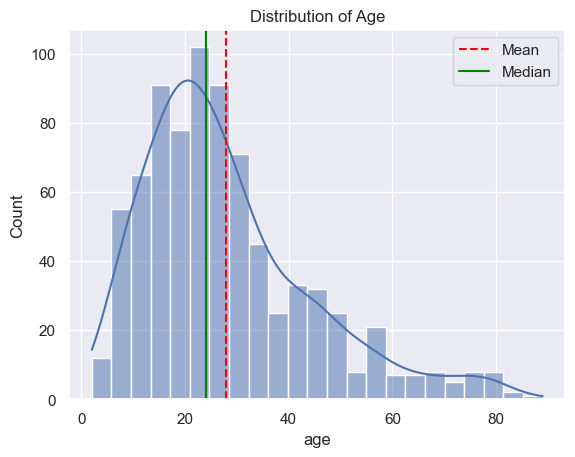

In [119]:
#histogram for age
sns.histplot(df["age"],kde=True)

plt.title("Distribution of Age")
# calculate mean & median
age_mean=df["age"].mean()
age_median=df["age"].median()
print("Mean:",age_mean)
print("Median:",age_median)

# add vertical lines for mean & median
plt.axvline(age_mean,color="red",linestyle="--",label="Mean")
plt.axvline(age_median,color="green",linestyle="-",label="Median")
plt.legend()

plt.show()

Mean: 8.537303106501248
Median: 9.605299308


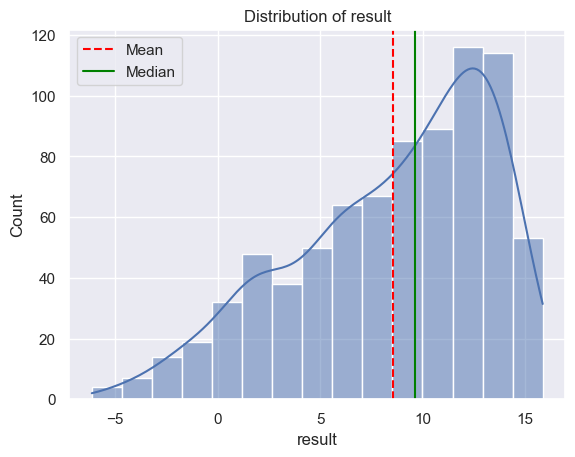

In [123]:
#histogram for result
sns.histplot(df["result"],kde=True)

plt.title("Distribution of result")
# calculate mean & median
result_mean=df["result"].mean()
result_median=df["result"].median()
print("Mean:",result_mean)
print("Median:",result_median)

# add vertical lines for mean & median
plt.axvline(result_mean,color="red",linestyle="--",label="Mean")
plt.axvline(result_median,color="green",linestyle="-",label="Median")
plt.legend()

plt.show()

BOX PLOTS FOR IDENTIFYING OUTLIERS IN THE NUMERICAL COLUMNS

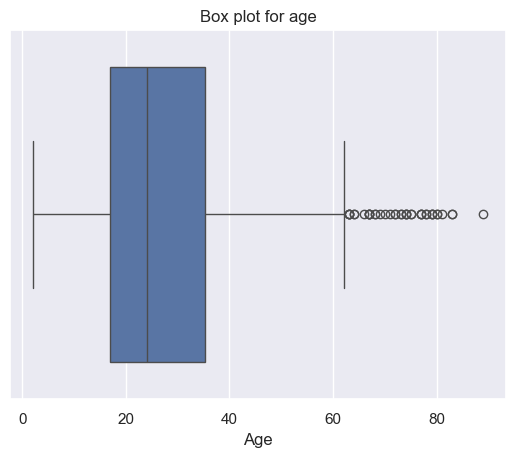

In [127]:
sns.boxplot(x=df["age"])
plt.title("Box plot for age")
plt.xlabel("Age")
plt.show()

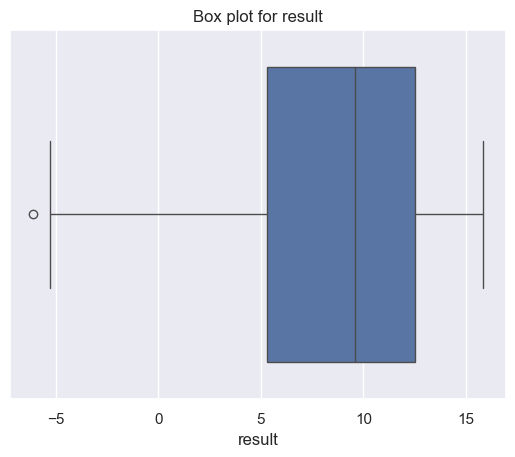

In [129]:
sns.boxplot(x=df["result"])
plt.title("Box plot for result")
plt.xlabel("result")
plt.show()

In [133]:
#count the outliers using IQR method
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]

In [135]:
age_outliers

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
19,1,1,1,1,1,1,1,1,1,1,72,m,White-European,no,yes,United States,yes,12.286905,Self,1
31,0,1,0,0,0,0,0,1,0,0,74,f,Asian,no,no,Jordan,no,2.412387,Self,0
33,1,1,1,1,1,1,1,0,1,1,67,m,White-European,yes,no,New Zealand,no,11.647281,Self,0
41,1,1,1,1,1,0,1,1,1,1,74,m,White-European,no,no,United Kingdom,no,7.387992,Self,0
92,0,1,1,1,1,1,0,1,1,1,75,m,Latino,no,yes,United States,no,6.699799,Self,0
93,0,0,0,0,0,0,0,0,0,0,79,m,?,no,no,India,no,7.813125,Self,0
161,1,1,1,1,1,1,1,1,1,1,79,f,White-European,yes,yes,United States,no,10.482143,Self,0
231,1,1,1,1,1,1,1,1,1,1,69,f,White-European,no,no,United States,no,2.459004,Self,1
238,1,1,1,1,1,0,1,1,1,1,64,f,Latino,yes,no,Australia,no,13.756476,Self,1
241,0,0,0,0,0,0,0,0,1,0,64,f,others,no,no,Jordan,no,2.142376,Self,0


In [137]:
len(age_outliers)

39

In [ ]:
# MEAN IS AFFECTED BY OUTLIERS MEADIAN NOT

In [139]:
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]

In [141]:
len(result_outliers)

1

In [143]:
# outliers are good 
#tree based models 
#linear regression models 

** UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS**

In [150]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

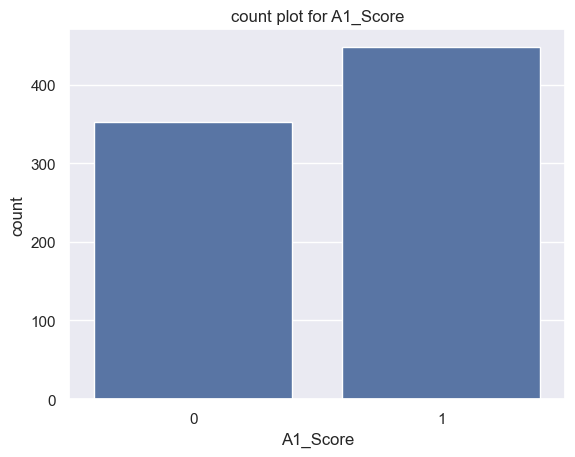

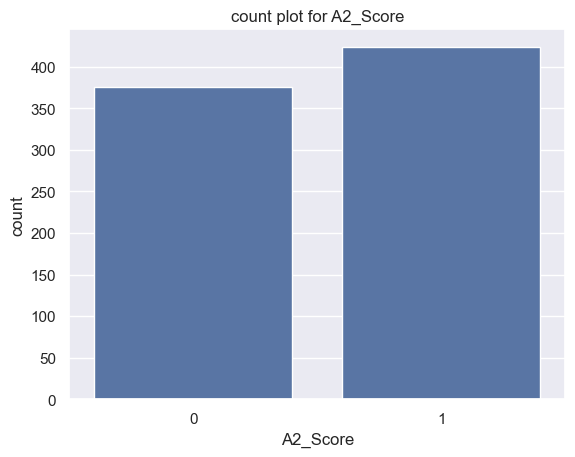

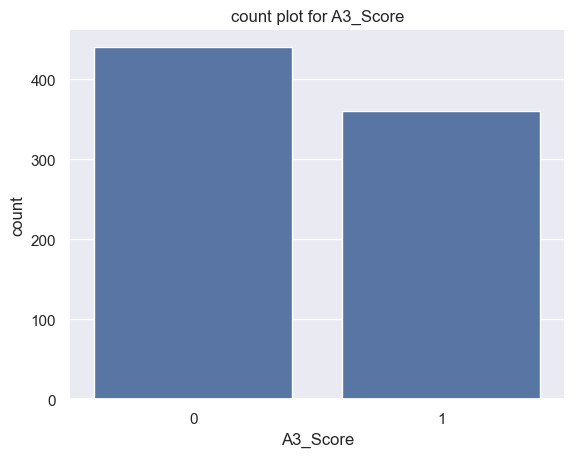

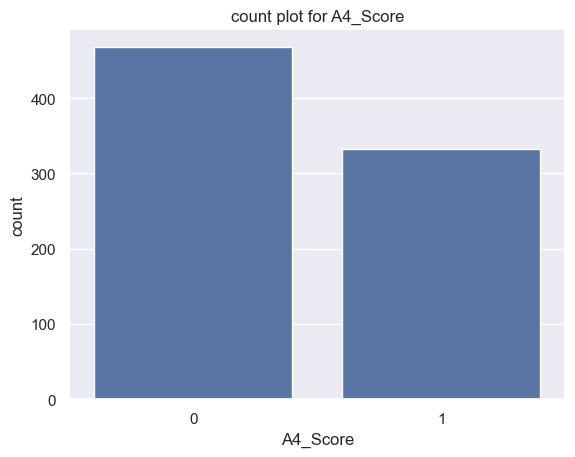

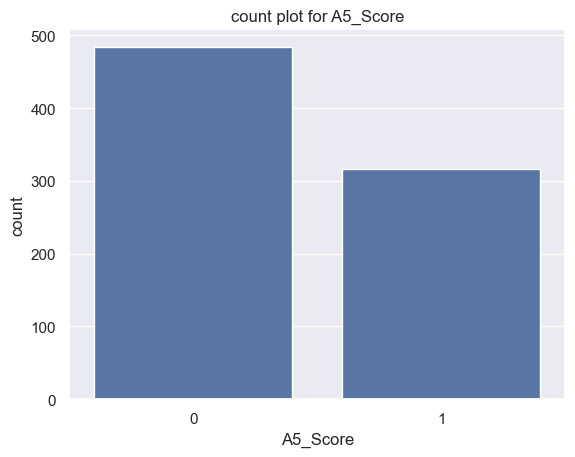

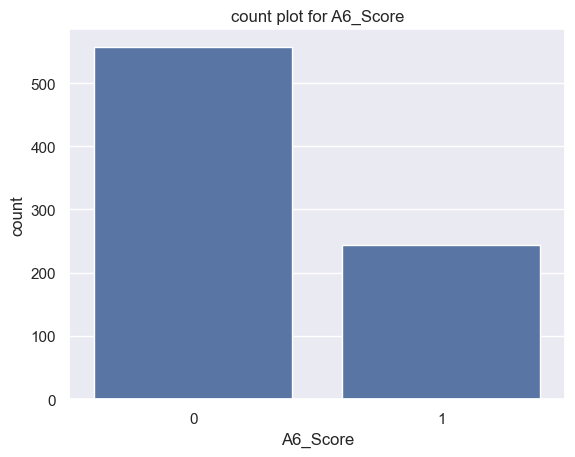

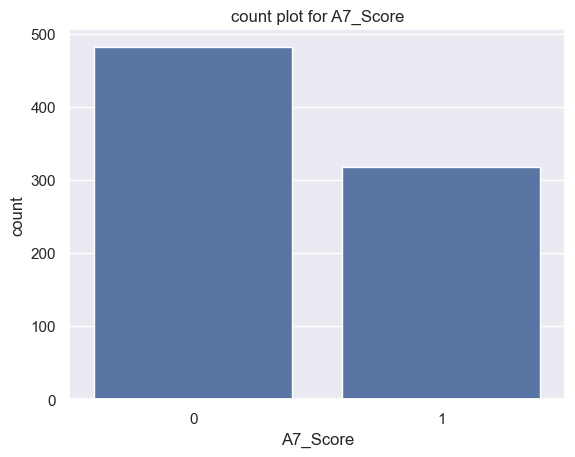

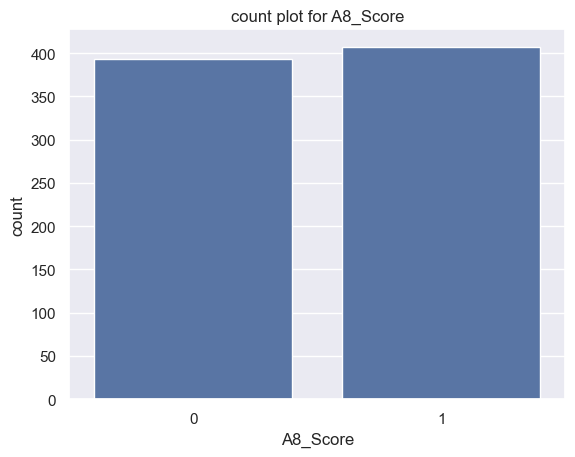

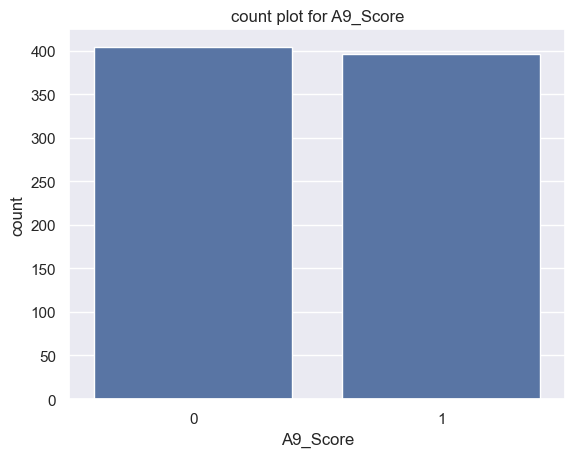

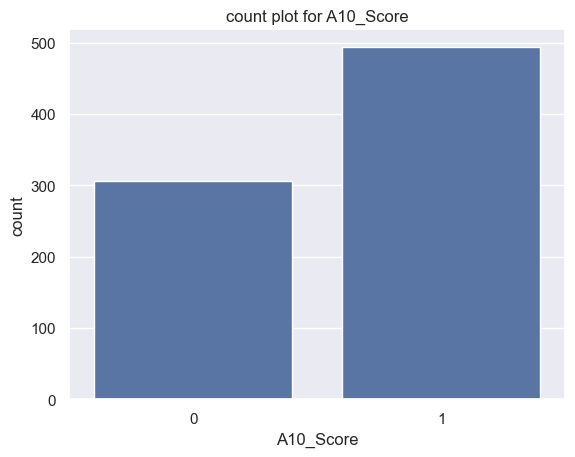

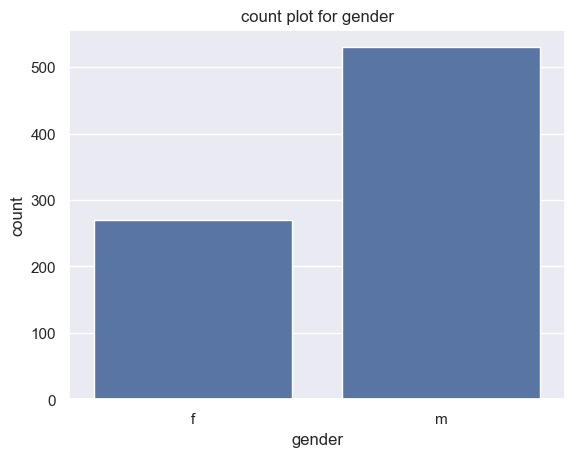

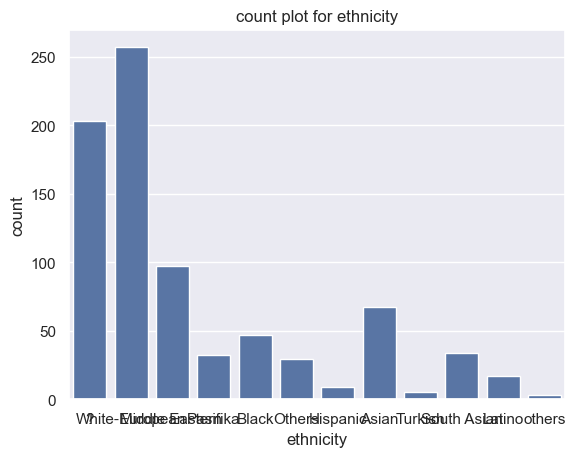

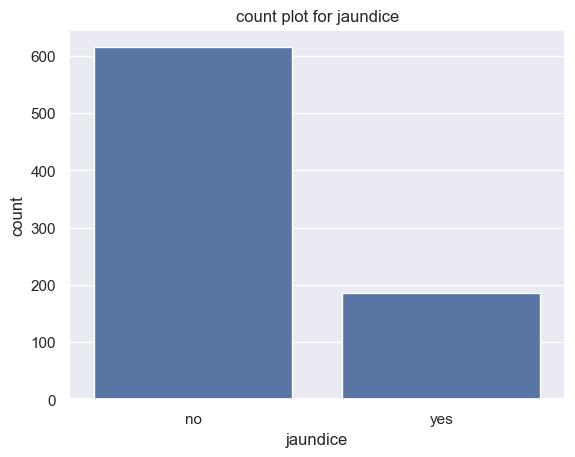

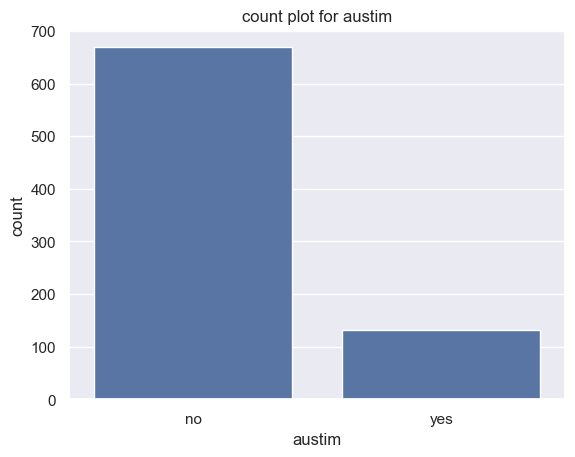

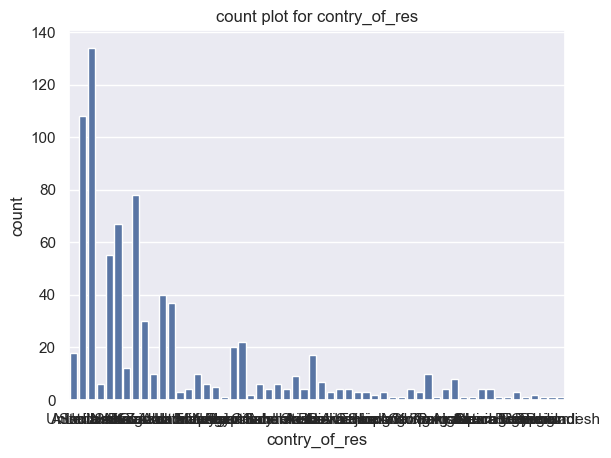

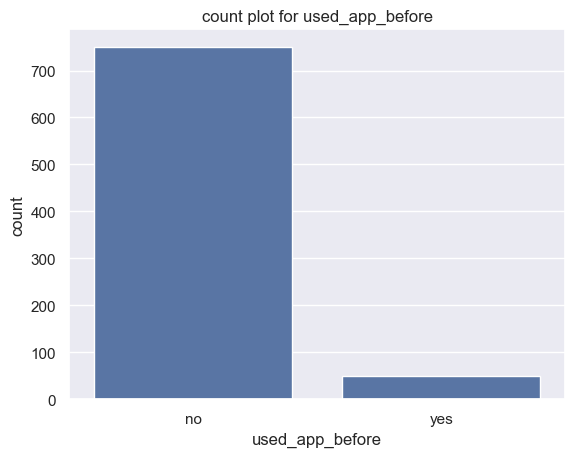

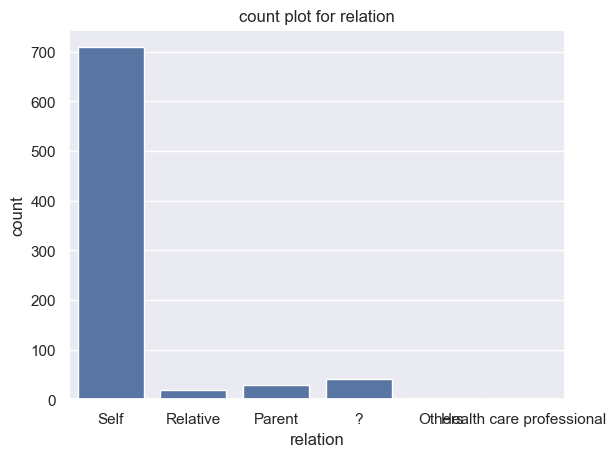

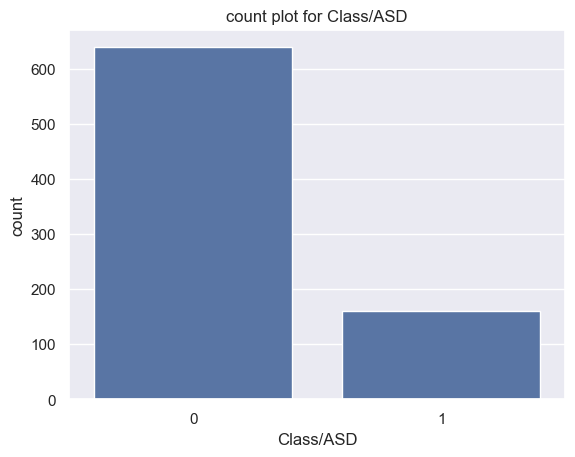

In [158]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation', 'Class/ASD']
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"count plot for {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

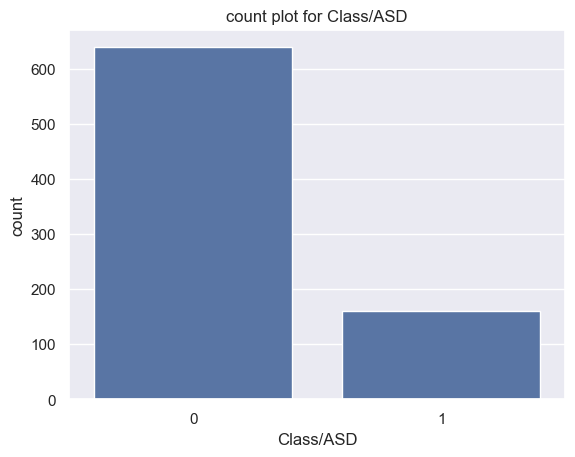

In [162]:
#countplot for target column(class/ ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("count")
plt.show()

In [164]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**HANDLE MISSING VALUE IN ETHNICITY AND RELATION COLOUMN**

In [183]:
df["ethnicity"]=df["ethnicity"].replace({"?": "Others","others": "Others"})


In [185]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [187]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [189]:
df["relation"]=df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional":"Others"}
)
     

In [191]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


** LABEL ENCODING**

In [194]:
# identify columns with "object" data type
object_columns=df.select_dtypes(include=["object"]).columns

In [196]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [204]:
# Initialize a dictionary to strore the encoders
encoders={}

# apply label encoding and store the encoders
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder  # saving the encoder for this column

#save the encoders as a pickle file
with open("encoders.pkl","wb")as f:
    pickle.dump(encoders,f)

In [206]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [208]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0


**BIVARIATE ANALYSIS**

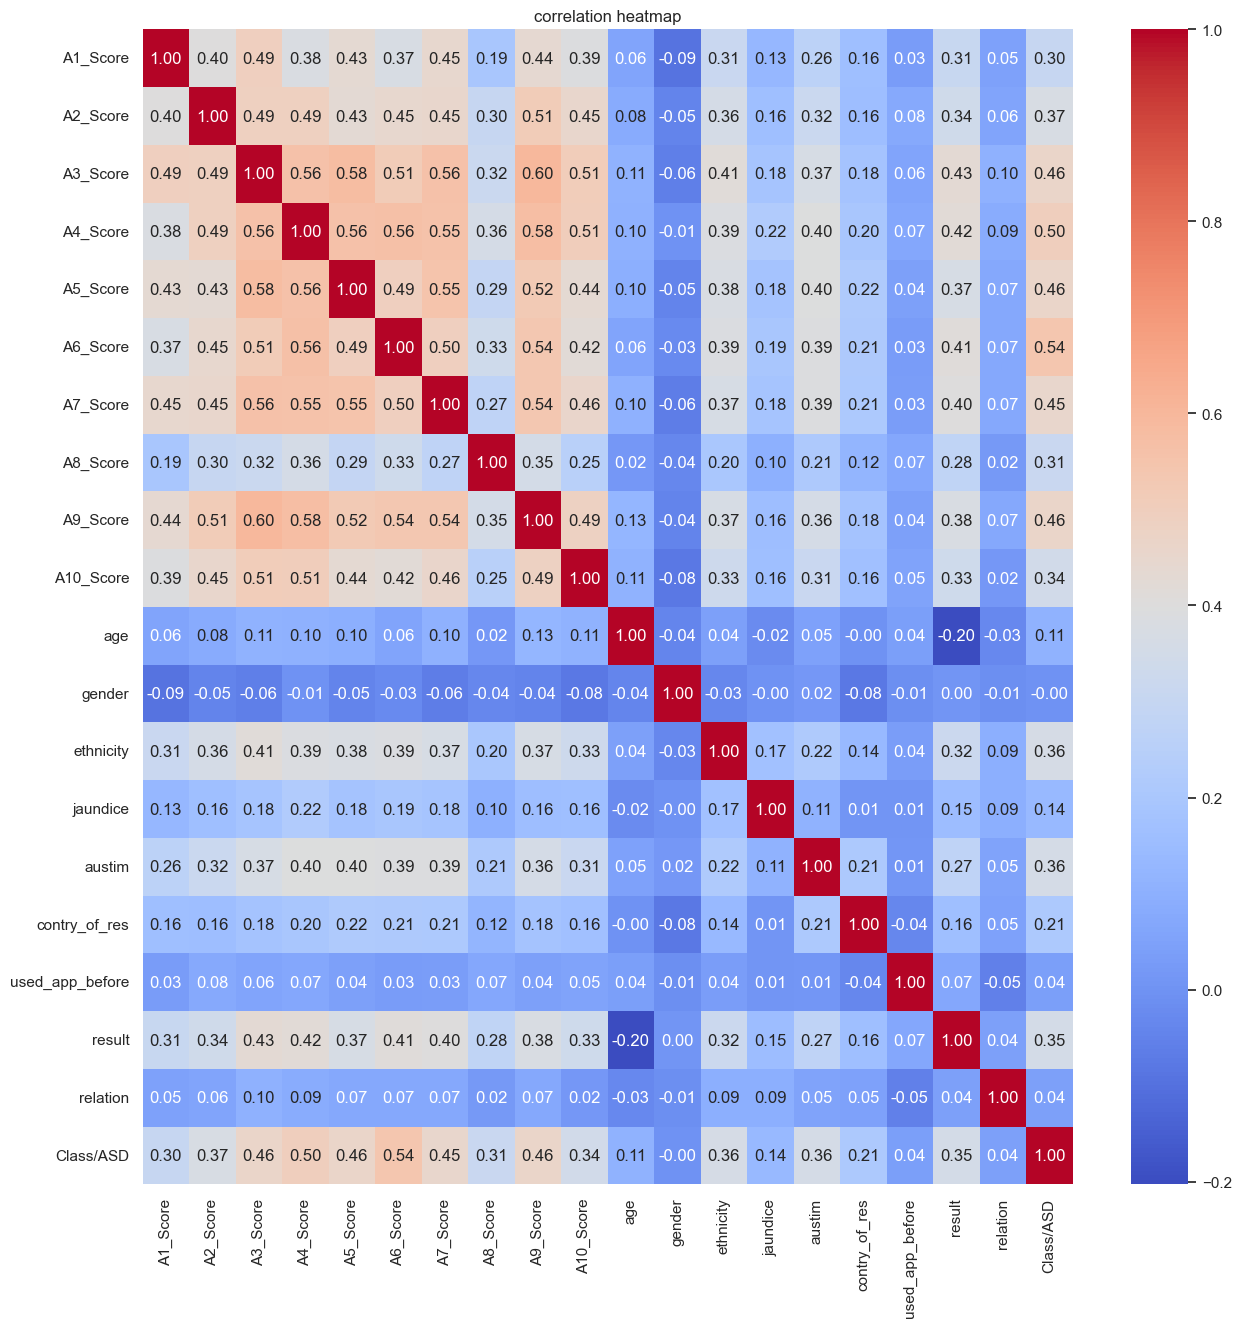

In [216]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()


**Insights from EDA**
-There are few outliers in the numerical columns (age,result)
-there is a class imbalance in the target colunm
-there is a class imbalance in the categorical features
-we dont have any highly correlated coloumns
-performed label encoding and saved encodes


4. DATA PREPROCESSING

tree based model so no feature scaling (logisting)


In [222]:
#function to handle outliers with median
def replace_outliers_with_median(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    median=df[column].median()
    df[column]=df[column].apply(lambda x:median if x<lower_bound or x>upper_bound else x)
    return df
    
    

In [224]:
# replace outliers in the age column

df=replace_outliers_with_median(df,"age")

#replace outliers in the result column
df=replace_outliers_with_median(df,"result")

In [226]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


In [230]:
df.shape


(800, 20)

**TRAIN TEST SPLIT**

In [233]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [235]:
X=df.drop(columns=["Class/ASD"])
y=df["Class/ASD"]

In [237]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [239]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [243]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [245]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [247]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

SMOTE (SYNThetic minority oversampling technique)

In [250]:
smote=SMOTE(random_state=42)

In [258]:
X_train_smote,y_train_smote= smote.fit_resample(X_train,y_train)

In [260]:
print(y_train_smote.shape)

(1030,)


In [264]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


5 **MODEL TRAINING**

In [274]:
# LIST OF CLASSIFIERS
models={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}

    

In [282]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}


In [280]:
#dictionary to store the cross validation results
cv_scores={}

for model_name,model in models.items():
    print(f"Training{model_name}with default parameters...")
    scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
    cv_scores[model_name]=scores
    print(f"{model_name}cross-validation Accuracy:{np.mean(scores):.2f}")
    print("-"*50)
    

TrainingDecision Treewith default parameters...
Decision Treecross-validation Accuracy:0.86
--------------------------------------------------
TrainingRandom Forestwith default parameters...
Random Forestcross-validation Accuracy:0.92
--------------------------------------------------
TrainingXGBoostwith default parameters...
XGBoostcross-validation Accuracy:0.90
--------------------------------------------------


In [284]:
cv_scores

{'Decision Tree': array([0.7815534 , 0.89320388, 0.88349515, 0.8592233 , 0.8592233 ]),
 'Random Forest': array([0.91262136, 0.93203883, 0.9223301 , 0.91262136, 0.91747573]),
 'XGBoost': array([0.86407767, 0.91747573, 0.91262136, 0.89805825, 0.91747573])}

6. **MODEL SELECTION & HYPERPARAMETER TUNING**

In [288]:
#Initailazing models 
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost=XGBClassifier(random_state=42)

In [322]:
#Hyperparameter grids for ranadomized search cv

param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True ,False]
    
}
param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [324]:
# hyperparameter tunning for 3 tree based models 
# the below steps can be automated by using a for loop or using a pipelines

#perform RandomizedSearchCV for each model'
random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_search_xgb=RandomizedSearchCV(estimator=xgboost,param_distributions=param_grid_xgb, n_iter=20,cv=5,scoring="accuracy",random_state=42)


In [327]:
#fit the models
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [331]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)
print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
0.8718446601941748
RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
0.9271844660194175


In [339]:
# get the model with best score
best_model=None
best_score=0

if random_search_dt.best_score_>best_score:
    best_model=random_search_dt.best_estimator_
    best_score=random_search_dt.best_score_
    
if random_search_rf.best_score_>best_score:
    best_model=random_search_rf.best_estimator_
    best_score=random_search_rf.best_score_
    
if random_search_xgb.best_score_>best_score:
    best_model=random_search_xgb.best_estimator_
    best_score=random_search_xgb.best_score_
    


In [341]:
print(f"Best Model:{best_model}")
print(f"best cross-validation Acuuracy:{best_score:.2f}")

Best Model:RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
best cross-validation Acuuracy:0.93


In [343]:
# save the best model
with open("best_model.pkl","wb") as f:
    pickle.dump(best_model,f)

7 **EValution**

In [352]:
# evaluate on the test data
y_test_pred=best_model.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report\n:",classification_report(y_test,y_test_pred))

Accuracy score: 0.85
Confusion Matrix:
 [[109  15]
 [  9  27]]
Classification Report
:               precision    recall  f1-score   support

           0       0.92      0.88      0.90       124
           1       0.64      0.75      0.69        36

    accuracy                           0.85       160
   macro avg       0.78      0.81      0.80       160
weighted avg       0.86      0.85      0.85       160

